In [220]:
import astropy
from astropy import io
from astropy.io import fits
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [221]:
fits_data = astropy.io.fits.open('asu.fit')
zcosmos = fits_data[1].data

In [222]:
name_info = fits_data[1].columns
print([i.name for i in name_info])
zcosmos_names = [i.name for i in name_info]

['zCOSMOS', 'RAJ2000', 'DEJ2000', 'z', 'CClass', 'Imag', 'Mask']


In [223]:
useful_columns_zcosmos_data = [zcosmos_names[3], zcosmos_names[5]]

In [224]:
print(useful_columns_zcosmos_data)

['z', 'Imag']


In [225]:
z = useful_columns_zcosmos_data[0]
zcosmos_redshift = zcosmos[z]
print(zcosmos_redshift)

[ 0.8798  0.6972  0.9069 ...,  0.7077  0.6776  0.8266]


In [226]:
fits_data2 = astropy.io.fits.open('asu2.fit')
cosmos = fits_data2[1].data

In [227]:
name_info2 = fits_data2[1].columns
print([i.name for i in name_info2])
cosmos_names = [i.name for i in name_info2]

['COSMOS', 'RAJ2000', 'DEJ2000', 'istar', 'imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'NB816', 'zphot']


In [228]:
useful_columns_cosmos_range = list(range(4, 14)) + [15]
useful_columns_cosmos_data = [cosmos_names[i] for i in useful_columns_cosmos_range]
print(useful_columns_cosmos_data)

['imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'zphot']


In [229]:
zphot = useful_columns_cosmos_data[10]
cosmos_redshift = cosmos[zphot]
print(cosmos_redshift)

[ 1.34  0.76  0.4  ...,  0.07  0.67  1.26]


In [230]:
print(len(zcosmos))
print(len(cosmos))

10644
438226


In [231]:
zcosmos_df = pd.DataFrame(fits_data[1].data)
zcosmos_df.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


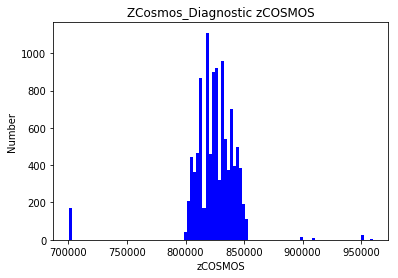

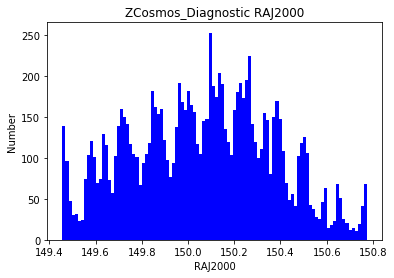

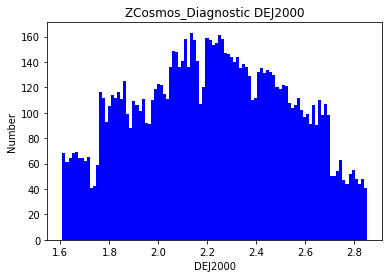

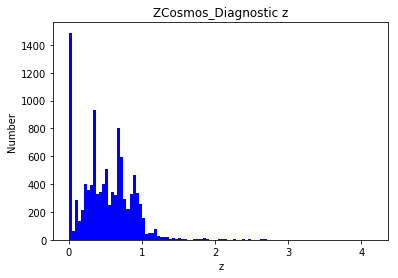

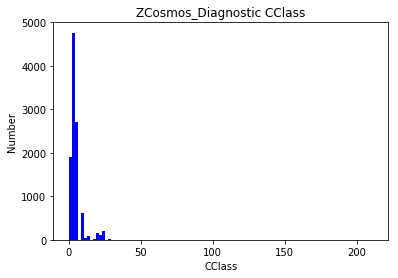

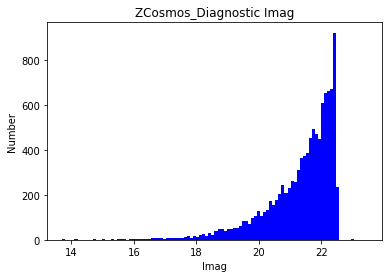

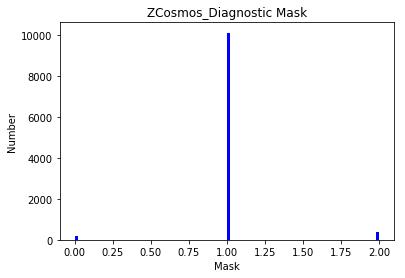

In [232]:
##diagnostic to find abnormal placeholder values for removal
for i in zcosmos_df:
    plt.hist(zcosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("ZCosmos_Diagnostic" + " " + i)
    plt.savefig("ZCosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [233]:
##remove abnormal placeholder values
zcosmos_df_part2 = zcosmos_df.query('z<999')
zcosmos_df_filtered = zcosmos_df_part2.query('z>0.000')
zcosmos_df_filtered.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


In [234]:
cosmos_df = pd.DataFrame(fits_data2[1].data)
cosmos_df.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
3,26433,150.73299,1.62607,0.60,24.8256,1,25.1141,24.8163,24.7607,24.7935,24.9016,24.7355,24.3860,0.0000,24.6030,0.01
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34


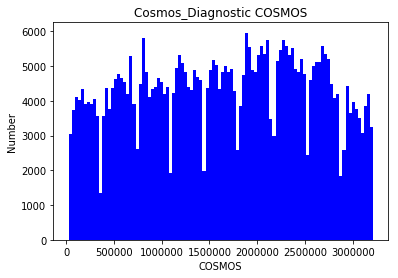

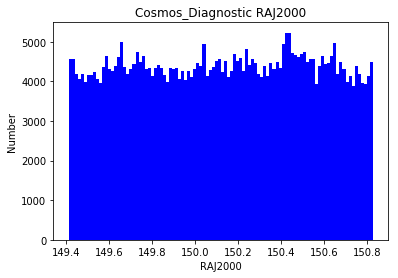

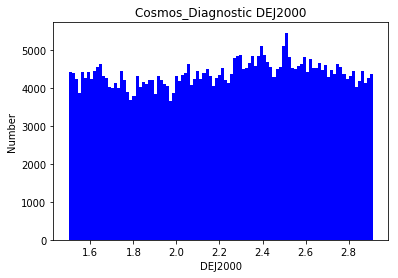

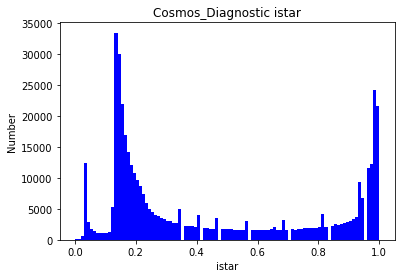

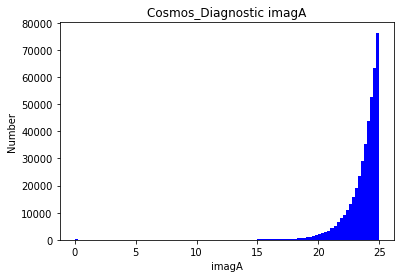

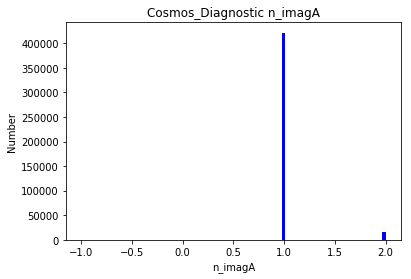

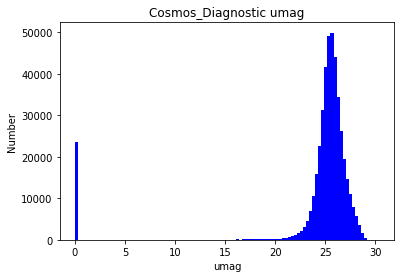

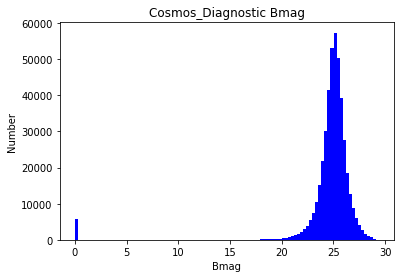

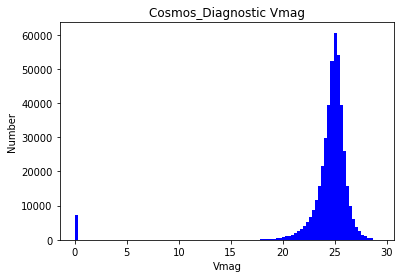

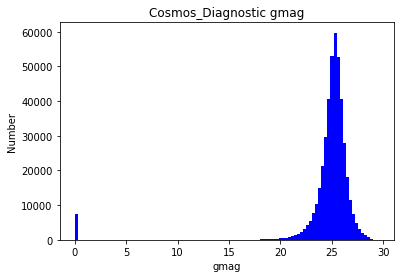

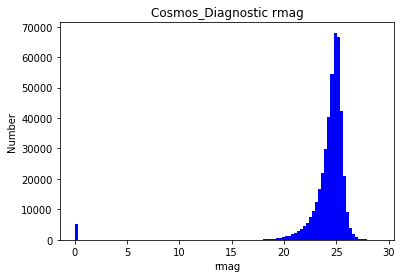

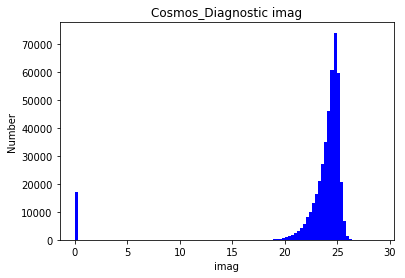

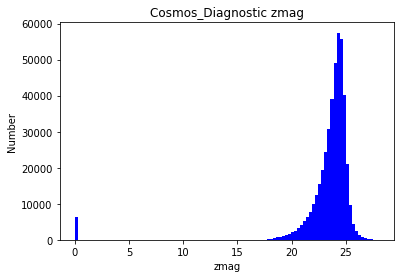

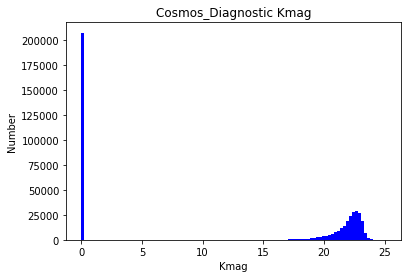

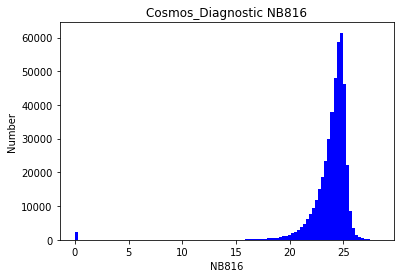

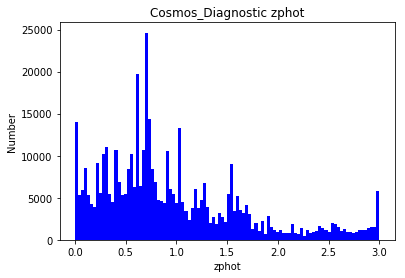

In [235]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_df:
    plt.hist(cosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_Diagnostic" + " " + i)
    plt.savefig("Cosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [236]:
#removal of abnormal placeholder values
cosmos_df_part1 = cosmos_df.query('zphot<999')
cosmos_df_part2 = cosmos_df_part1.query('umag>0.00')
cosmos_df_part3 = cosmos_df_part2.query('Bmag>0.00')
cosmos_df_part4 = cosmos_df_part3.query('Vmag>0.00')
cosmos_df_part5 = cosmos_df_part4.query('gmag>0.00')
cosmos_df_part6 = cosmos_df_part5.query('rmag>0.00')
##says the one below has a function, but I don't see one...
##cosmos_df_part7 = cosmos_df_part6.query('imag>0.00')
cosmos_df_part8 = cosmos_df_part7.query('zmag>0.00')
cosmos_df_part9 = cosmos_df_part8.query('Kmag>0.00')
cosmos_df_filtered = cosmos_df_part9.query('zphot>0.000')
cosmos_df_filtered.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34
5,26437,150.73287,1.62514,0.52,20.5785,2,21.0047,20.6726,20.5957,20.6621,20.8121,0.0000,20.4596,20.4376,20.5521,0.01


In [237]:
##cross match of cosmos and zcosmos from http://cdsxmatch.u-strasbg.fr/xmatch
cosmos_and_zcosmos_cross_match1 = pd.read_csv('cross_match.csv')

In [238]:
(cosmos_and_zcosmos_cross_match1[:20]).columns

Index(['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000',
       'istar', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag',
       'NB816', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
       'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask'],
      dtype='object')

In [239]:
print(cosmos_and_zcosmos_cross_match1.columns)

Index(['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000',
       'istar', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag',
       'NB816', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
       'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask'],
      dtype='object')


In [240]:
cosmos_and_zcosmos_cross_match_useful_columns = ['COSMOS', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag', 'zphot', 'zCOSMOS', 'z', 'CClass', 'Imag']

In [241]:
import numpy as np
np.any(np.isnan(cosmos_and_zcosmos_cross_match1['Bmag']))


True

In [243]:
#removal of abnormal placeholder values
cosmos_and_zcosmos_cross_match2 = cosmos_and_zcosmos_cross_match1.query('zphot<999')
cosmos_and_zcosmos_cross_match3 = cosmos_and_zcosmos_cross_match2.query('Bmag>0.00')
cosmos_and_zcosmos_cross_match4 = cosmos_and_zcosmos_cross_match3.query('Vmag>0.00')
cosmos_and_zcosmos_cross_match5 = cosmos_and_zcosmos_cross_match4.query('gmag>0.00')
cosmos_and_zcosmos_cross_match6 = cosmos_and_zcosmos_cross_match5.query('rmag>0.00')
cosmos_and_zcosmos_cross_match7 = cosmos_and_zcosmos_cross_match6.query('Imag>0.00')
cosmos_and_zcosmos_cross_match8 = cosmos_and_zcosmos_cross_match7.query('zmag>0.00')
cosmos_and_zcosmos_cross_match9 = cosmos_and_zcosmos_cross_match8.query('zphot>0.000')
cosmos_and_zcosmos_cross_match10 = cosmos_and_zcosmos_cross_match9.query('z>0.000')
cosmos_and_zcosmos_cross_match11 = cosmos_and_zcosmos_cross_match10.query('imagA>0.000')

COSMOS


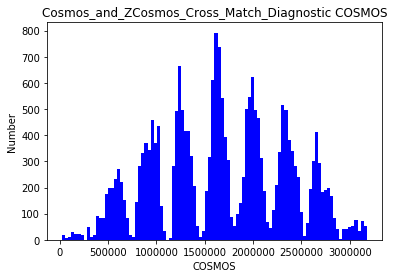

imagA


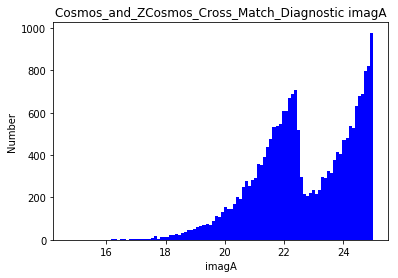

n_imagA


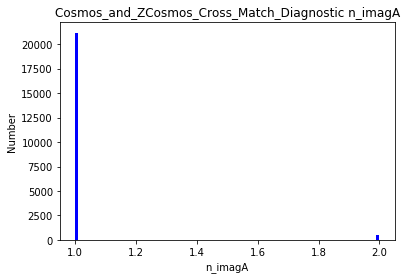

Bmag


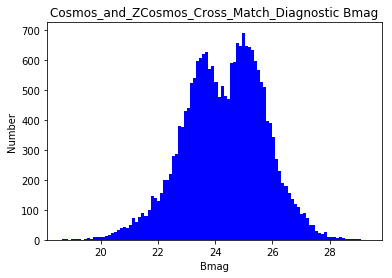

Vmag


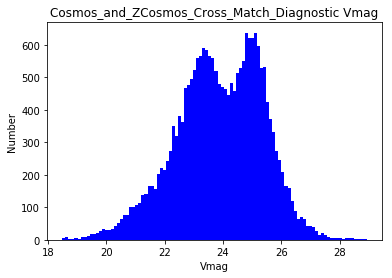

gmag


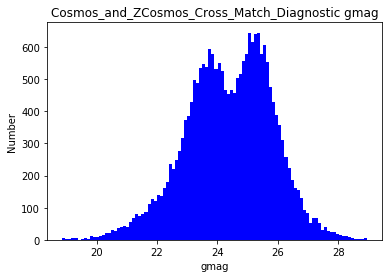

rmag


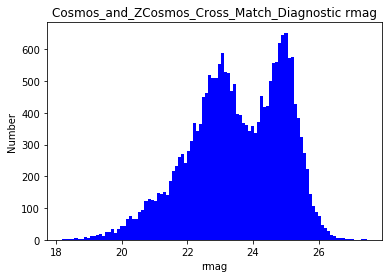

zmag


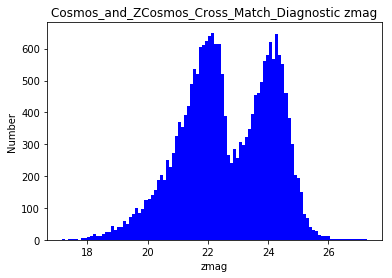

zphot


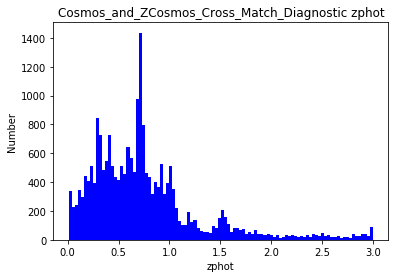

zCOSMOS


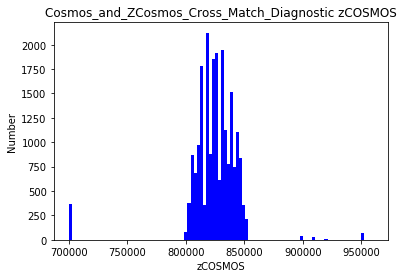

z


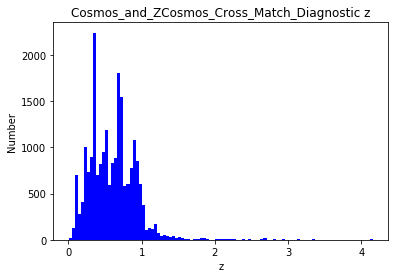

CClass


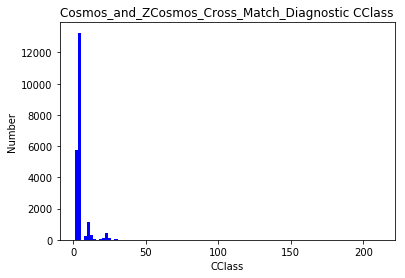

Imag


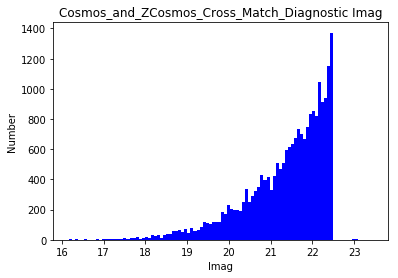

In [244]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_and_zcosmos_cross_match.columns:
    print(i)
    plt.hist(cosmos_and_zcosmos_cross_match11[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i)
    plt.savefig("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [245]:
##Find duplicates in cosmos_and_zcosmos_cross_match
total = 0
for i in cosmos_and_zcosmos_cross_match11:
    for line in cosmos_and_zcosmos_cross_match11:
        finded = line.find(i)
        if finded != -1 and finded != 0:
            total += 1
            if total > 1: 
                print(i)
##The only duplicates it shows me are ones I knew would be there (columns), so it seems there is nothing more for me to do about this. 

RAJ2000
RAJ2000
DEJ2000
DEJ2000
imagA
RAJ2000.1
DEJ2000.1


In [246]:
##here is the document I actually need
cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match11[cosmos_and_zcosmos_cross_match_useful_columns]

In [247]:
##Get only the points in cosmos that arent also in zcosmos.
cosmos_only = cosmos_df_filtered[~cosmos_df_filtered['COSMOS'].isin(cosmos_and_zcosmos_cross_match['COSMOS'])]
print(len(cosmos_only))

197722


In [248]:
##Get only the points in zcosmos that arent also in cosmos.
zcosmos_only = zcosmos_df_filtered[~zcosmos_df_filtered['zCOSMOS'].isin(cosmos_and_zcosmos_cross_match['zCOSMOS'])]
print(len(zcosmos_df_not_in_cosmos))

30


In [249]:
cosmos_only.columns

Index(['COSMOS', 'RAJ2000', 'DEJ2000', 'istar', 'imagA', 'n_imagA', 'umag',
       'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'NB816',
       'zphot'],
      dtype='object')

COSMOS


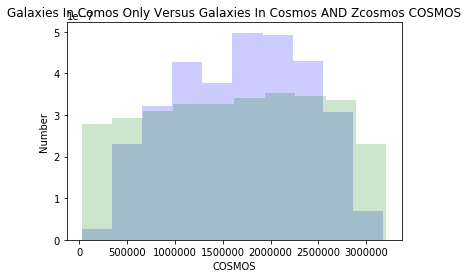

imagA


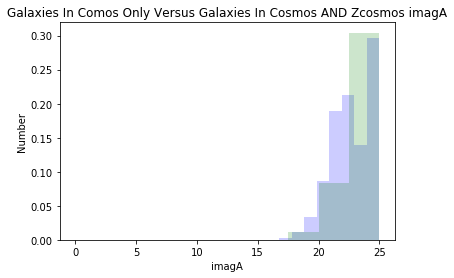

n_imagA


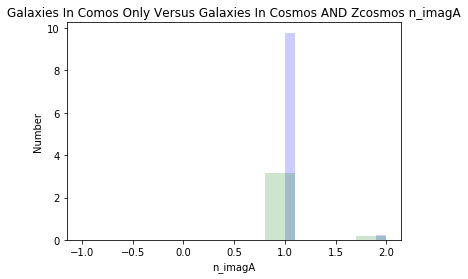

Bmag


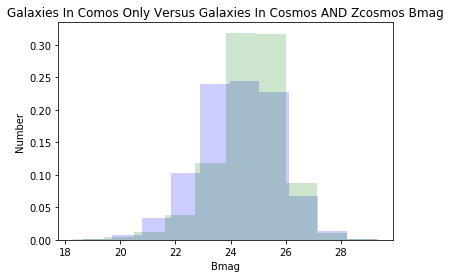

Vmag


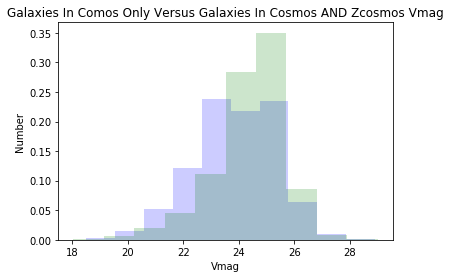

gmag


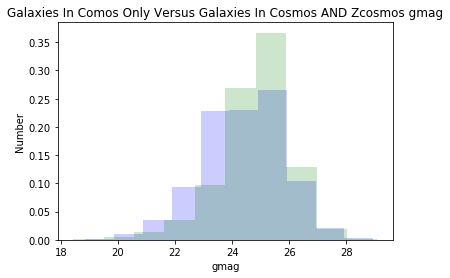

rmag


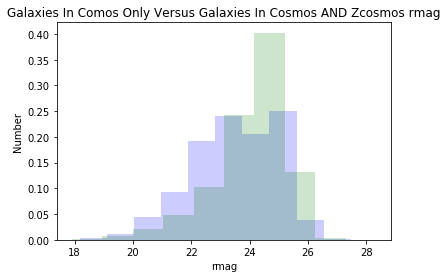

zmag


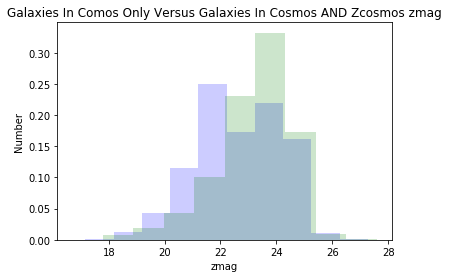

zphot


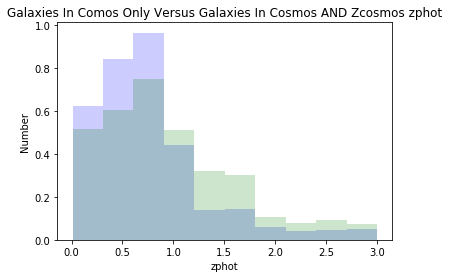

In [250]:
##Comparing the magnitudes/redshifts of galaxies in both cosmos and zcosmos and galaxies just in cosmos
for i in cosmos_only.columns:
    if i in cosmos_and_zcosmos_cross_match.columns:
        print(i)
        plt.hist(cosmos_and_zcosmos_cross_match[i], color='blue', linewidth=5, alpha=.2, normed = True)
        plt.hist(cosmos_only[i], color='green', linewidth=5, alpha=.2, normed = True)
        plt.xlabel(i)
        plt.ylabel("Number")
        plt.title("Galaxies In Comos Only" + " " + "Versus" + " " + "Galaxies In Cosmos AND Zcosmos" + " " + i)
        plt.savefig("Galaxies In Comos Only" + " " + "Versus" + "Galaxies In Cosmos AND Zcosmos" + " " + i + " " + "Plot.png")
        plt.show()